In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import itertools
import gc
import os
import sys
%matplotlib inline

In [ ]:
!wget https://www.dropbox.com/s/ncqb2ctkg7da11k/weather.csv

--2021-05-08 12:40:36--  https://www.dropbox.com/s/ncqb2ctkg7da11k/weather.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/ncqb2ctkg7da11k/weather.csv [following]
--2021-05-08 12:40:36--  https://www.dropbox.com/s/raw/ncqb2ctkg7da11k/weather.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc15f3ec23573bceef138faee4de.dl.dropboxusercontent.com/cd/0/inline/BOFy6MoLBgbrLuPpWFr4hcpq-IMEhAAvjVMQwn0ukSoKBDY8IiEq-3DOGH-1DIC53_6E2K8cRylibar2R-SAIbG-y3fa2LSPWFxD2Pj_wR6mck93Sf66mqwhqv9dgie7Br5w7kxHN9MTkp102rJTCU83/file# [following]
--2021-05-08 12:40:37--  https://uc15f3ec23573bceef138faee4de.dl.dropboxusercontent.com/cd/0/inline/BOFy6MoLBgbrLuPpWFr4hcpq-IMEhAAvjVMQwn0ukSoKBDY8IiEq-3DOGH-1DIC53_6E2K8cRylibar2R-SAIbG-y3fa2

In [ ]:
!wget https://www.dropbox.com/s/brixkogrmhan6ed/cab_rides.csv

--2021-05-08 12:40:41--  https://www.dropbox.com/s/brixkogrmhan6ed/cab_rides.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/raw/brixkogrmhan6ed/cab_rides.csv [following]
--2021-05-08 12:40:41--  https://www.dropbox.com/s/raw/brixkogrmhan6ed/cab_rides.csv
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc35e19f9954978bd954eda0b76f.dl.dropboxusercontent.com/cd/0/inline/BOGftI2MSsvilH7yj2V0L9c9ZNjMO0pJu5Y4eJdKceQj8IAGmQ2xxoSwpcLOuoBicfw3-tLXbG8sued69vpYp-44StVsojGHoa0k1pc-GhVcZcbEIdLmZoMcJuoSZ_Tb82lmeBTCZHq_Yf1bzUfYtjlT/file# [following]
--2021-05-08 12:40:42--  https://uc35e19f9954978bd954eda0b76f.dl.dropboxusercontent.com/cd/0/inline/BOGftI2MSsvilH7yj2V0L9c9ZNjMO0pJu5Y4eJdKceQj8IAGmQ2xxoSwpcLOuoBicfw3-tLXbG8sued69vpYp-4

In [ ]:
#https://www.kaggle.com/gemartin/load-data-reduce-memory-usage
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                  df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                #if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                 #   df[col] = df[col].astype(np.float16)
                #el
                if c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
       # else:
            #df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is: {:.2f} MB -->{:.2f} MB (Decreased by {:.1f}%'.format(
        start_mem, end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [ ]:
cab_data = pd.read_csv("/content/cab_rides.csv")
cab_data = reduce_mem_usage(cab_data)
weather_data = pd.read_csv("/content/weather.csv")
weather_data = reduce_mem_usage(weather_data)

Memory usage of dataframe is: 52.88 MB -->44.95 MB (Decreased by 15.0%
Memory usage of dataframe is: 0.38 MB -->0.22 MB (Decreased by 43.7%


In [ ]:
cab_data.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL


In [ ]:
weather_data.head()

,temp,location,clouds,pressure,rain,time_stamp,humidity,wind
0,42.419998,Back Bay,1.0,1012.140015,0.1228,1545003901,0.77,11.25
1,42.430000,Beacon Hill,1.0,1012.150024,0.1846,1545003901,0.76,11.32
2,42.500000,Boston University,1.0,1012.150024,0.1089,1545003901,0.76,11.07
3,42.110001,Fenway,1.0,1012.130005,0.0969,1545003901,0.77,11.09
4,43.130001,Financial District,1.0,1012.140015,0.1786,1545003901,0.75,11.49


In [ ]:
cab_data.shape

(693071, 10)

In [ ]:
weather_data.shape

(6276, 8)

In [ ]:
cab_data.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name'],
      dtype='object')

In [ ]:
weather_data.columns

Index(['temp', 'location', 'clouds', 'pressure', 'rain', 'time_stamp',
       'humidity', 'wind'],
      dtype='object')

In [ ]:
#converting time_stamp into datetime
import datetime        
cab_data['datetime']=pd.to_datetime(cab_data['time_stamp'])
cab_data
weather_data['date_time']=pd.to_datetime(weather_data['time_stamp'])

In [ ]:
weather_data.shape

(6276, 9)

In [ ]:
cab_data.shape

(693071, 11)

In [ ]:
cab_data.describe()

,distance,time_stamp,price,surge_multiplier
count,693071.000000,6.930710e+05,637976.000000,693071.000000
mean,2.190057,1.544046e+12,16.543797,1.013870
std,1.138935,6.891925e+08,9.319172,0.091467
min,0.020000,1.543204e+12,2.500000,1.000000
25%,1.280000,1.543444e+12,9.000000,1.000000
50%,2.160000,1.543737e+12,13.500000,1.000000
75%,2.920000,1.544828e+12,22.500000,1.000000
max,7.860000,1.545161e+12,97.500000,3.000000


In [ ]:
weather_data.describe()

,temp,clouds,pressure,rain,time_stamp,humidity,wind
count,6276.000000,6276.000000,6276.000000,894.000000,6.276000e+03,6276.000000,6276.000000
mean,39.090378,0.677775,1008.443176,0.057652,1.543857e+09,0.763976,6.802810
std,6.022061,0.314283,12.870790,0.100758,6.659340e+05,0.127340,3.633476
min,19.620001,0.000000,988.250000,0.000200,1.543204e+09,0.450000,0.290000
25%,36.077501,0.440000,997.747498,0.004900,1.543387e+09,0.670000,3.517500
50%,40.130001,0.780000,1007.659973,0.014850,1.543514e+09,0.760000,6.570000
75%,42.832501,0.970000,1018.479980,0.060925,1.544691e+09,0.890000,9.920000
max,55.410000,1.000000,1035.119995,0.780700,1.545159e+09,0.990000,18.180000


In [ ]:
a=pd.concat([cab_data,weather_data])   #concatenate both the data

In [ ]:
a.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,datetime,temp,location,clouds,pressure,rain,humidity,wind,date_time
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,1970-01-01 00:25:44.952607890,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,1970-01-01 00:25:43.284023677,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,1970-01-01 00:25:43.366822198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,1970-01-01 00:25:43.553582749,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,1970-01-01 00:25:43.463360223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [ ]:
a['day']=a.date_time.dt.day
a['hour']=a.date_time.dt.hour

In [ ]:
a.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,datetime,temp,location,clouds,pressure,rain,humidity,wind,date_time,day,hour
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,1970-01-01 00:25:44.952607890,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,1970-01-01 00:25:43.284023677,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,1970-01-01 00:25:43.366822198,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,1970-01-01 00:25:43.553582749,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,1970-01-01 00:25:43.463360223,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN


In [ ]:
a.tail()
#here we get the value of day and hour

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,datetime,temp,location,clouds,pressure,rain,humidity,wind,date_time,day,hour
6271,NaN,NaN,1543819974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,44.720001,North Station,0.89,1000.690002,NaN,0.96,1.52,1970-01-01 00:00:01.543819974,1.0,0.0
6272,NaN,NaN,1543819974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,44.849998,Northeastern University,0.88,1000.710022,NaN,0.96,1.54,1970-01-01 00:00:01.543819974,1.0,0.0
6273,NaN,NaN,1543819974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,44.820000,South Station,0.89,1000.700012,NaN,0.96,1.54,1970-01-01 00:00:01.543819974,1.0,0.0
6274,NaN,NaN,1543819974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,44.779999,Theatre District,0.89,1000.700012,NaN,0.96,1.54,1970-01-01 00:00:01.543819974,1.0,0.0
6275,NaN,NaN,1543819974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT,44.689999,West End,0.89,1000.700012,NaN,0.96,1.52,1970-01-01 00:00:01.543819974,1.0,0.0


In [ ]:
#fill NAN value with 0 using fillna
a.fillna(0,inplace=True)

In [ ]:
a.head()

,distance,cab_type,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,datetime,temp,location,clouds,pressure,rain,humidity,wind,date_time,day,hour
0,0.44,Lyft,1544952607890,North Station,Haymarket Square,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,lyft_line,Shared,1970-01-01 00:25:44.952607890,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
1,0.44,Lyft,1543284023677,North Station,Haymarket Square,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,lyft_premier,Lux,1970-01-01 00:25:43.284023677,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
2,0.44,Lyft,1543366822198,North Station,Haymarket Square,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,lyft,Lyft,1970-01-01 00:25:43.366822198,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
3,0.44,Lyft,1543553582749,North Station,Haymarket Square,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,lyft_luxsuv,Lux Black XL,1970-01-01 00:25:43.553582749,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0
4,0.44,Lyft,1543463360223,North Station,Haymarket Square,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,lyft_plus,Lyft XL,1970-01-01 00:25:43.463360223,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,0.0


In [ ]:
a.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name', 'datetime', 'temp',
       'location', 'clouds', 'pressure', 'rain', 'humidity', 'wind',
       'date_time', 'day', 'hour'],
      dtype='object')

In [ ]:
#there are two types of cab_type if we want to see what are they 
#we use groupby

a.groupby('cab_type').count()  #this will count the whole numbers(add them)

,distance,time_stamp,destination,source,price,surge_multiplier,id,product_id,name,datetime,temp,location,clouds,pressure,rain,humidity,wind,date_time,day,hour
cab_type,,,,,,,,,,,,,,,,,,,,
0,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276,6276
Lyft,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408,307408
Uber,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663,385663


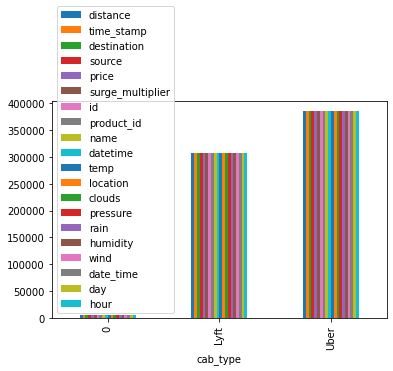

In [ ]:
a.groupby('cab_type').count().plot.bar()

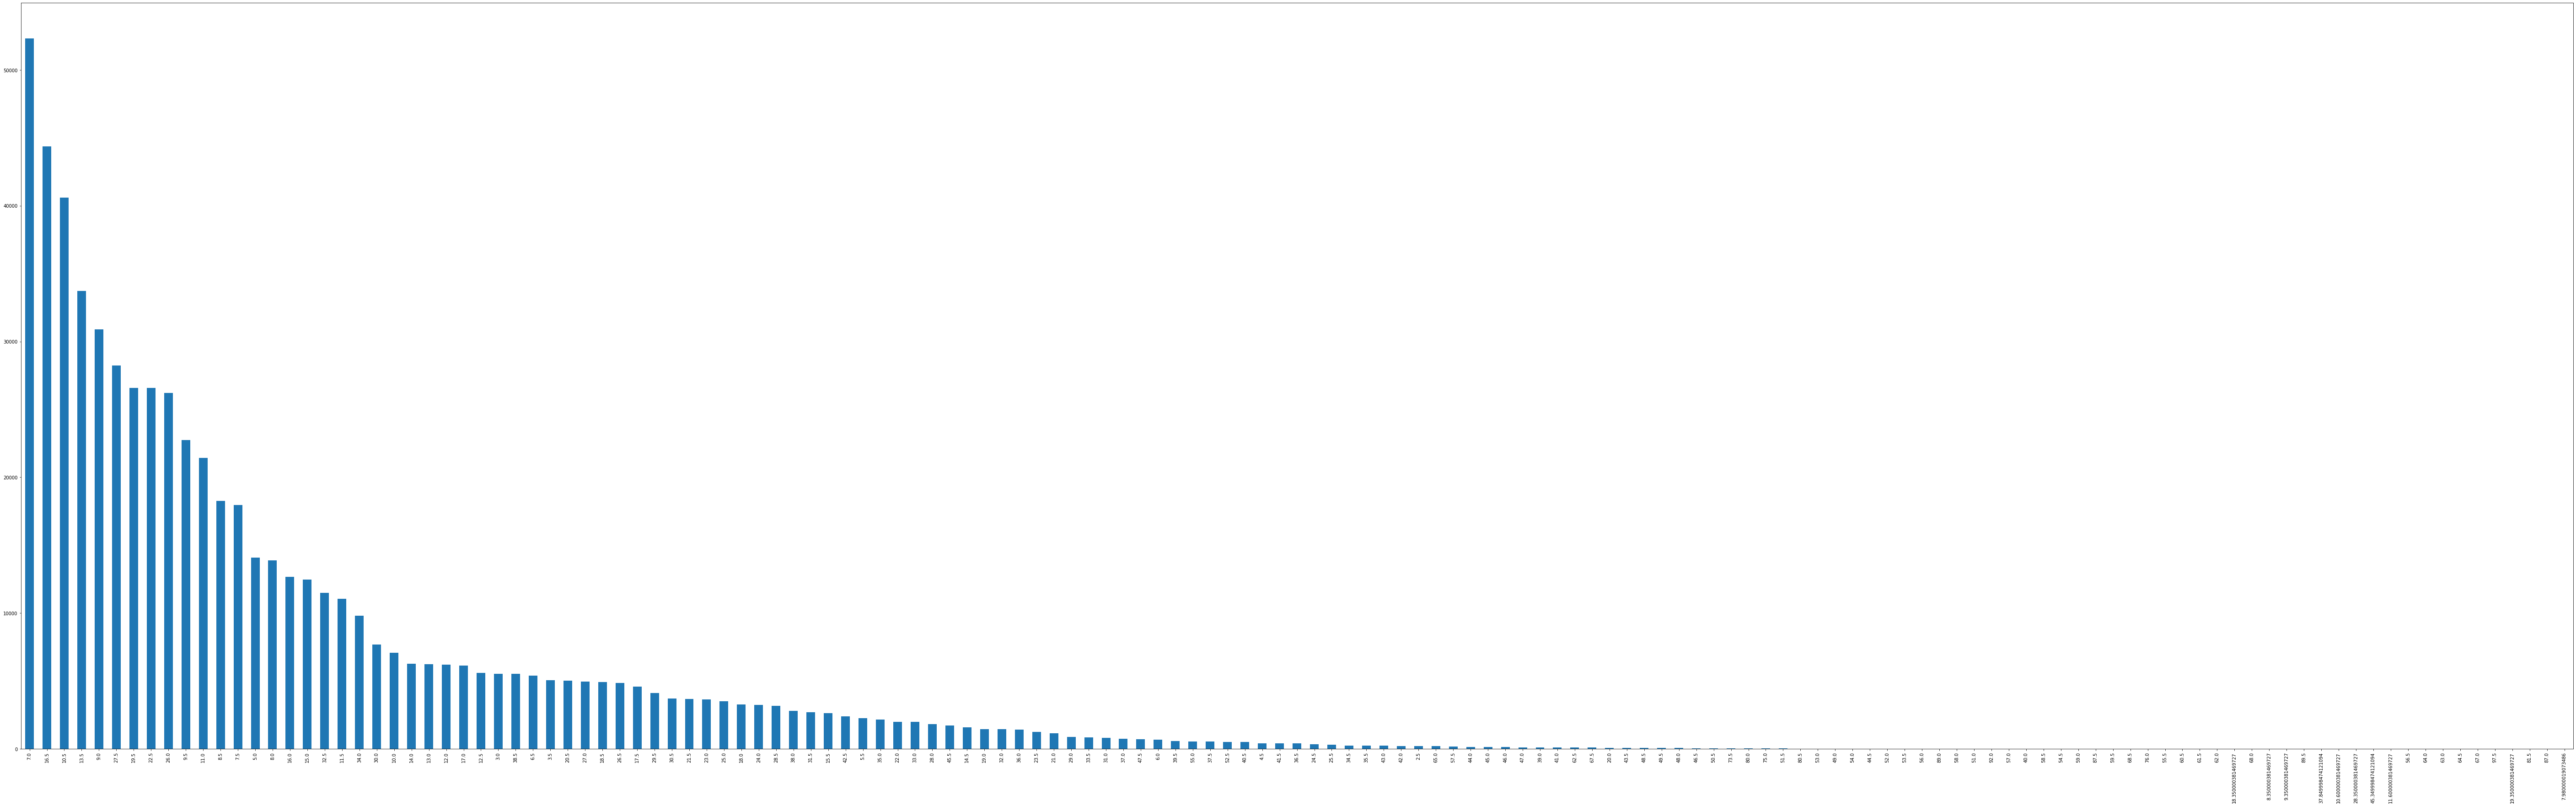

In [ ]:
a['price'].value_counts().plot.bar(figsize=(100,30))  #flaxuation of price

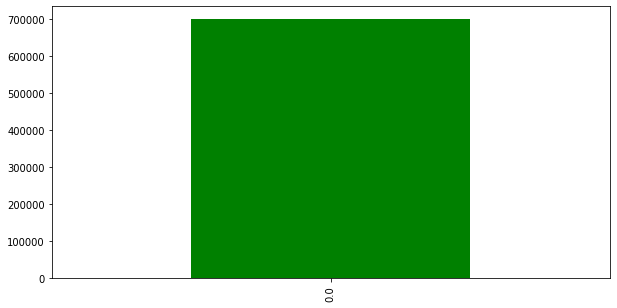

In [ ]:
#to find the peek hour for cab

a['hour'].value_counts().plot.bar(figsize=(10,5),color='g')

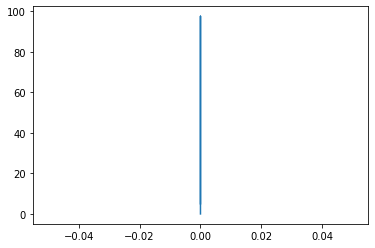

In [ ]:
import matplotlib.pyplot as plt
x=a['hour']
y=a['price']
plt.plot(x,y)
plt.show()

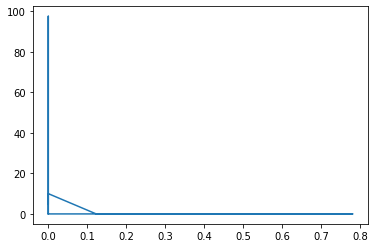

In [ ]:
x=a['rain']
y=a['price']
plt.plot(x,y)
plt.show()

In [ ]:
#DATA MODELING

In [ ]:
a.columns

Index(['distance', 'cab_type', 'time_stamp', 'destination', 'source', 'price',
       'surge_multiplier', 'id', 'product_id', 'name', 'datetime', 'temp',
       'location', 'clouds', 'pressure', 'rain', 'humidity', 'wind',
       'date_time', 'day', 'hour'],
      dtype='object')

In [ ]:
#x1 main attributes to train data model(x1=training data)
x1=a[['distance','temp','pressure','humidity','wind','rain','day','hour','surge_multiplier','clouds']]
#(y1=label data)
y1=a['price']


In [ ]:
#using skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
#split the data into training and testing sets
x_train,y_train,x_test,y_test = train_test_split(x1,y1,test_size=0.25,random_state =42)

In [ ]:
linear=LinearRegression()
linear.fit(x_train,x_test)   #x_train=attributes(train data) y= price(label data)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
predictions= linear.predict(y_train)
predictions     #predicted value

array([32.5479163 , 14.7556079 , 16.81696887, ..., 11.82898386,
       11.85443274, 13.22867338])

In [ ]:
df=pd.DataFrame({'Actual':y_test,'predicted':predictions})
df

,Actual,predicted
81607,42.5,32.547916
354,0.0,14.755608
471801,32.5,16.816969
407645,27.5,10.480192
474760,27.5,10.556539
...,...,...
538489,7.5,10.709232
579511,13.5,15.519075
5421,9.0,11.828984
279982,8.0,11.854433


In [ ]:
#DATA VISUALIZATION

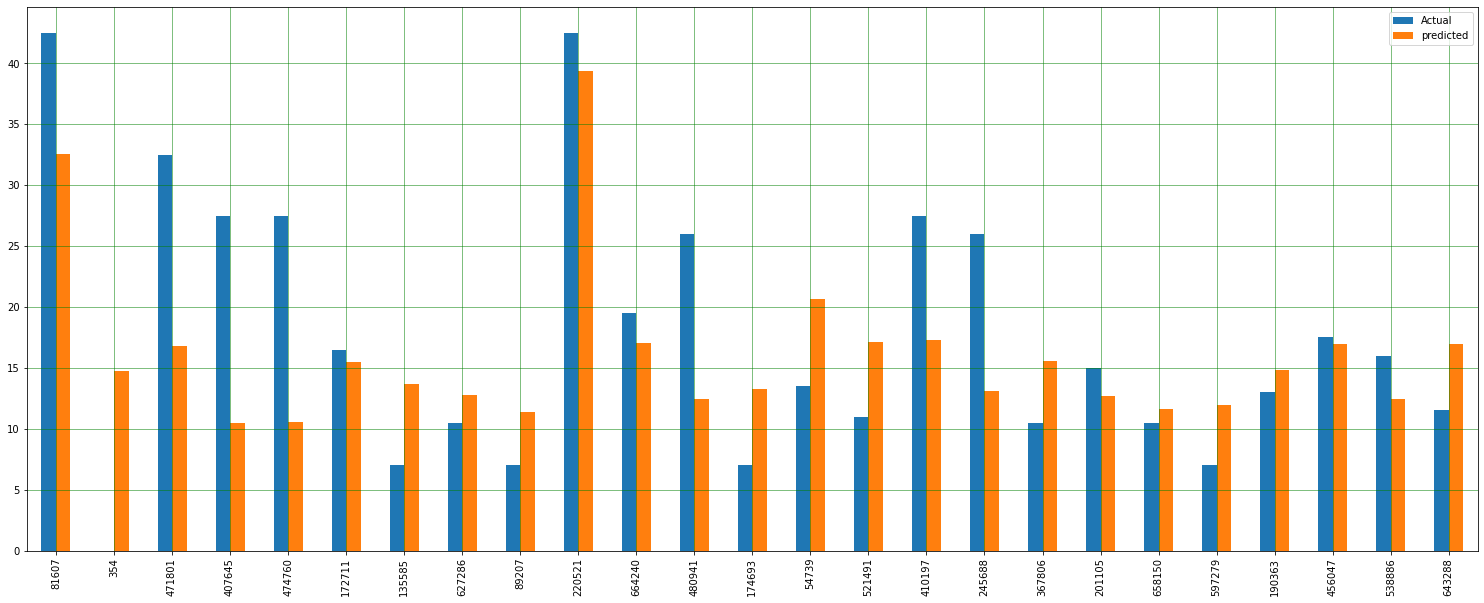

In [ ]:
df1 = df.head(25)
df1.plot.bar(figsize=(26,10))
plt.grid(which='major',linestyle='-',linewidth='0.5',color='green')
plt.grid(which='minor',linestyle=':',linewidth='0.5',color='black')
plt.show()